In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import plotly.graph_objects as go

In [146]:
!git config --global user.name "adrianandhika"
!git config --global user.email "adrian10ian@gmail.com"

'git' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.


In [101]:
df = pd.read_csv('data.csv')
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
2,3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
3,4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
4,5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,General Dynamics,Airspace and defense,"38,469",8.7%,"103,100","Reston, Virginia"
96,97,CHS,Agriculture cooperative,"38,448",1.4%,"9,941","Inver Grove Heights, Minnesota"
97,98,USAA,Financials,"37,470",3.2%,"37,335","San Antonio, Texas"
98,99,Northwestern Mutual,Insurance,"36,751",8.8%,"7,585","Milwaukee, Wisconsin"


In [102]:
df_subset = df[['Name','Industry','Revenue (USD millions)','Revenue growth','Employees']]
df_subset = df_subset.rename(columns={'Revenue (USD millions)' : 'Revenue'})
df = df_subset
df['Revenue'] = df['Revenue'].str.replace(',', '').astype(int)
df['Employees'] = df['Employees'].str.replace(',', '').astype(int)
df

,Name,Industry,Revenue,Revenue growth,Employees
0,Walmart,General merchandisers,572754,2.4%,2300000
1,Amazon,Retail and Cloud Computing,469822,21.7%,1608000
2,Apple,Electronics industry,365817,33.2%,154000
3,CVS Health,Healthcare,292111,32.0%,258000
4,UnitedHealth Group,Healthcare,287597,11.8%,350000
...,...,...,...,...,...
95,General Dynamics,Airspace and defense,38469,8.7%,103100
96,CHS,Agriculture cooperative,38448,1.4%,9941
97,USAA,Financials,37470,3.2%,37335
98,Northwestern Mutual,Insurance,36751,8.8%,7585


C:\Users\Adrian\AppData\Local\Temp\ipykernel_12040\810149673.py:9: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



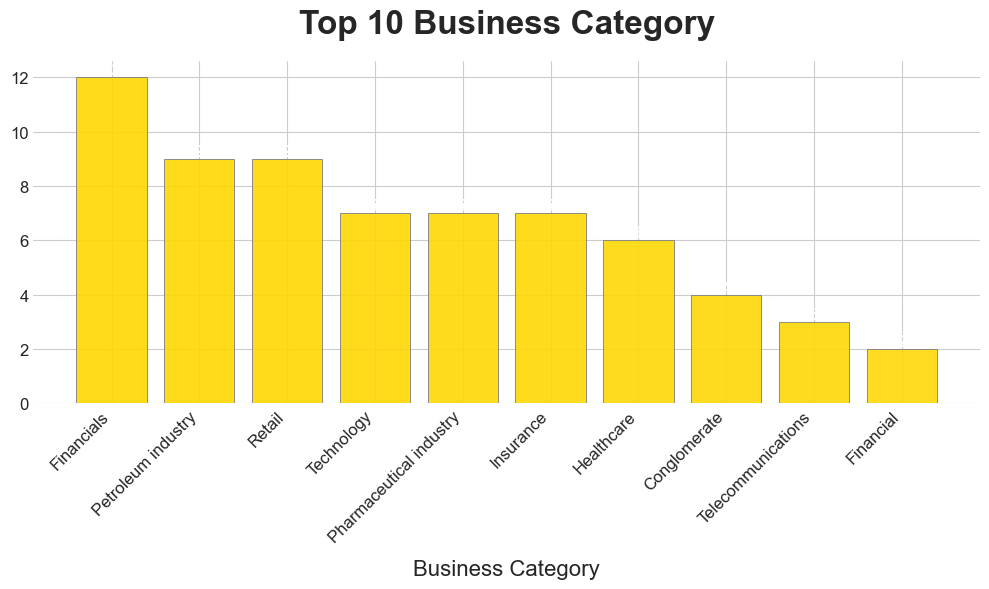

In [103]:
df_subset['Industry'].nunique()
distinct_counts = df_subset['Industry'].value_counts().sort_values(ascending=False)
top_10_distinct_counts = distinct_counts.head(10)

custom_gold_colors = mcolors.LinearSegmentedColormap.from_list("", ["gold", "white"])

# Set the background color and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')  # Use seaborn grid style
plt.gca().set_facecolor('#F5F5F5')  # Set background color

# Plot the vertical bar plot with custom gold to white colors
bars = plt.bar(top_10_distinct_counts.index, top_10_distinct_counts, color=custom_gold_colors(range(len(top_10_distinct_counts))))
plt.title('Top 10 Business Category', fontsize=24, fontweight='bold', fontname='Arial', pad=20)
plt.xlabel('Business Category', fontsize=16, fontname='Arial', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12, fontname='Arial')  # Rotate and set font size for x-axis labels
plt.yticks(fontsize=12, fontname='Arial')
plt.box(on=None)  # Remove the box around the plot

# Annotate each bar with its value in white color
for bar, value in zip(bars, top_10_distinct_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='white')

# Add a subtle shadow effect
for bar in bars:
    bar.set_edgecolor('gray')
    bar.set_linewidth(0.7)
    bar.set_alpha(0.9)

plt.tight_layout()  # Adjust spacing
plt.show()

In [131]:

# Get the top 50 categories by revenue
top_50_categories = df.nlargest(50, 'Revenue')

# Create a line plot using Plotly
fig = go.Figure()

# Gold-to-white color gradient
def get_color(idx, total):
    r = 255 - idx * (255 / (total - 1))
    return f'rgb(255, {int(r)}, 0)'

# Add traces for each category
for idx, row in top_50_categories.iterrows():
    marker_size = 16 if row['Revenue'] == top_50_categories['Revenue'].max() else 8  # Increase marker size for the highest value
    fig.add_trace(go.Scatter(
        x=[row['Name']],
        y=[row['Revenue']],
        mode='lines+markers',   # Use lines and markers to create a line plot
        line=dict(color=get_color(idx, len(top_50_categories))),  # Apply gold-to-white color gradient to the line
        marker=dict(
            color=get_color(idx, len(top_50_categories)),  # Apply gold-to-white color gradient to the marker
            size=marker_size,
            line=dict(width=1, color='black'),
        ),
        name=row['Name']
    ))

# Set layout properties for the plot
fig.update_layout(
    title='Top 50 Revenue Comparison',
    xaxis=dict(
        title='Name',
        showgrid=True,
        gridcolor='lightgray',  # Add grid lines
        gridwidth=0.25,        # Set grid line width
        tickfont=dict(size=10)  # Adjust x-axis tick font size
    ),
    yaxis=dict(
        title='Revenue',
        showgrid=True,
        gridcolor='lightgray',  # Add grid lines
        gridwidth=0.25,        # Set grid line width
        tickfont=dict(size=10)  # Adjust y-axis tick font size
    ),
    plot_bgcolor='white',  # Set plot background color
    width=1000,             # Increase the plot width
    height=600              # Increase the plot height
)

fig.show()

In [141]:
import plotly.express as px

# Get the top 50 categories by employees
top_50_categories = df.nlargest(50, 'Employees')

# Create a line plot using Plotly Express
fig = px.line(
    top_50_categories,
    x='Name',
    y='Employees',
    line_shape='linear',  # Use straight lines instead of curves
    color_discrete_sequence=px.colors.sequential.Viridis_r,  # Apply the Viridis color scale in reverse order
)

# Increase marker size for the highest value
highest_employees = top_50_categories['Employees'].max()
fig.update_traces(marker=dict(size=[16 if employees == highest_employees else 8 for employees in top_50_categories['Employees']]))

# Set layout properties for the plot
fig.update_layout(
    title='Top 50 Employees Comparison (Line Plot)',
    xaxis=dict(
        title='Name',
        showgrid=True,
        gridcolor='lightgray',  # Add grid lines
        gridwidth=0.25,        # Set grid line width
        tickfont=dict(size=10)  # Adjust x-axis tick font size
    ),
    yaxis=dict(
        title='Employees',
        showgrid=True,
        gridcolor='lightgray',  # Add grid lines
        gridwidth=0.25,        # Set grid line width
        tickfont=dict(size=10)  # Adjust y-axis tick font size
    ),
    plot_bgcolor='white',  # Set plot background color
    width=1000,             # Increase the plot width
    height=600              # Increase the plot height
)

fig.show()